<a href="https://colab.research.google.com/github/mateoLoxzDigital/poc_repo/blob/main/POC_Text_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# build basic Bee Plugin Template Flask App and the Marlowe button just submits the data to the Loxz Digital API

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## downloading and unzipping data from UCI ML database:

# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

# import zipfile

# path_to_zip_file = 'smsspamcollection.zip'
# directory_to_extract_to = './content/drive/MyDrive/MailUp_Project/data/'
# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract_to)

In [42]:
data = pd.read_csv('/content/drive/MyDrive/MailUp_Project/data/wrangled_data.csv')

In [54]:
data.head()

,label,text,length,title,title_length,click_through,abandoned_cart,unsubscribed,open_rate,num_pics,num_videos,video_length,length_binned,title_length_binned,campain_type,industry
0,0,"Go until jurong point, crazy.. Available only ...",20,"Go until jurong point, crazy",5,0,1,1,1,2,2,69,med,med,Promotional,Medical
1,0,Ok lar... Joking wif u oni...,6,Ok lar,2,1,0,1,0,1,3,107,small,small,Survey,Hospitality
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,Free entry in 2 a wkly comp to win FA Cup fina...,16,0,1,1,1,3,0,68,big,bigger,Survey,Industrial
3,0,U dun say so early hor... U c already then say...,11,U dun say so early hor,6,1,0,1,1,0,3,112,med,med,No_Opener,Automotive
4,0,"Nah I don't think he goes to usf, he lives aro...",13,"Nah I don't think he goes to usf, he lives aro...",13,0,1,1,1,5,1,101,med,bigger,Revenue_Based,Automotive


# End data wrangling here atleast...

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   label                5169 non-null   int64 
 1   text                 5169 non-null   object
 2   length               5169 non-null   int64 
 3   title                5169 non-null   object
 4   title_length         5169 non-null   int64 
 5   click_through        5169 non-null   int64 
 6   abondoned_cart       5169 non-null   int64 
 7   open_rate            5169 non-null   int64 
 8   num_pics             5169 non-null   int64 
 9   num_videos           5169 non-null   int64 
 10  video_length         5169 non-null   int64 
 11  length_binned        5169 non-null   object
 12  title_length_binned  5169 non-null   object
dtypes: int64(9), object(4)
memory usage: 565.4+ KB


In [ ]:
# Summary Statistics on Non_Spam Emails
data[data.label==0].describe()

,label,length
count,4516.0,4516.000000
mean,0.0,70.459256
std,0.0,56.358207
min,0.0,2.000000
25%,0.0,34.000000
50%,0.0,52.000000
75%,0.0,90.000000
max,0.0,910.000000


In [ ]:
# Summary Statistics on Spam Emails
data[data.label==1].describe()

,label,length
count,653.0,653.000000
mean,1.0,137.891271
std,0.0,30.137753
min,1.0,13.000000
25%,1.0,132.000000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


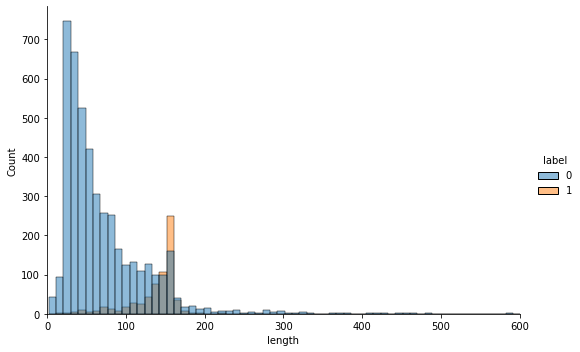

In [ ]:
sns.displot(data=data, x = 'length', hue = 'label', height=5, aspect=1.5)
plt.xlim((0,600))
plt.show()

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
data.text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will _ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: text, Length: 5169, dtype: object

In [ ]:
# removing non-english characters:
data.text.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

In [ ]:
text

In [ ]:
w_tokenizer = WhitespaceTokenizer()
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    text = [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
    text = ' '.join(text)
    return text

text = data.text.apply(lemmatize_text)


final_stopwords_list = stopwords.words('english')
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200000, 
                                   min_df=0.001, stop_words=final_stopwords_list, 
                                   use_idf=True, ngram_range=(1,2))

In [ ]:
tfidf_X = tfidf_vectorizer.fit_transform(text)

In [ ]:
# I don't necessarily need the dataframe...(maybe for EDA to map column names to features)

# tfidf_df = pd.DataFrame(tfidf_X.A, columns=tfidf_vectorizer.get_feature_names())
# print(tfidf_df.shape)
# tfidf_df.head()

## Modeling

In [ ]:

# declaring target variable: y
y=data.label

# creating train test split for TFIDF Vectorizer:
tfidf_X_train, tfidf_X_test, tfidf_y_train, tfidf_y_test = train_test_split(tfidf_X, y, test_size=0.25, random_state=42)


ValueError: ignored

### MultiNomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report

In [ ]:
#Multinomial Naive Bayes
model=MultinomialNB()
model.fit(tfidf_X_train,tfidf_y_train)
y_preds=model.predict(tfidf_X_test)
print("Multinomial Naive Bayes:",classification_report(tfidf_y_test,y_preds))

Multinomial Naive Bayes:               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1107
           1       0.98      0.88      0.93       186

    accuracy                           0.98      1293
   macro avg       0.98      0.94      0.96      1293
weighted avg       0.98      0.98      0.98      1293



## Regression Prediction Just Based On (selected variable)

(convert 'length into a binned group, then with that I can change the binning to see the adjusted prediction probabilities)

In [55]:
data.head(2)

,label,text,length,title,title_length,click_through,abandoned_cart,unsubscribed,open_rate,num_pics,num_videos,video_length,length_binned,title_length_binned,campain_type,industry
0,0,"Go until jurong point, crazy.. Available only ...",20,"Go until jurong point, crazy",5,0,1,1,1,2,2,69,med,med,Promotional,Medical
1,0,Ok lar... Joking wif u oni...,6,Ok lar,2,1,0,1,0,1,3,107,small,small,Survey,Hospitality


In [37]:
print(data.columns)

Index(['label', 'text', 'length', 'title', 'title_length', 'click_through',
       'abondoned_cart', 'open_rate', 'num_pics', 'num_videos', 'video_length',
       'length_binned', 'title_length_binned', 'campain_type', 'industry'],
      dtype='object')


In [38]:
print(target_variables)

['label', 'unsubscribes', 'open_rate', 'click_through', 'abandoned_cart']


In [56]:
# pick a variable column to the list above(for now the target variable should be categorical in nature)

selected_dependent_target_variable =  target_variables[0] # label

# dropping all other dependent variables not being used in analysis as we don't have this data for the test data

# drop 'text' and 'title' for now as not necessarily performing NLP on the data at this type 
# NLP and Computer Vision change scope and scale of the project

X = data.drop(columns=target_variables)
X = X.drop(columns=['text','title'])

# Dropping length to just make prediction based on bin, not specific value, 
# otherwise I would need to separate models, with and without the specific value

# might have to do this for video_length/title_length if going to switch out the bin values 
X = X.drop(columns=['length'])

y = data[selected_dependent_target_variable]

In [57]:
X_temp = X.copy()
X = pd.get_dummies(X)

In [60]:
# creating train test split for TFIDF Vectorizer:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
X_train.head()

,label,title_length,abondoned_cart,open_rate,num_pics,num_videos,video_length,"length_binned_(0, 10]","length_binned_(10, 20]","length_binned_(20, 40]","length_binned_(40, 200]","title_length_binned_(0, 4]","title_length_binned_(4, 8]","title_length_binned_(8, 12]","title_length_binned_(12, 16]","title_length_binned_(16, 100]"
5022,0,19,0,1,2,1,19,0,1,0,0,0,0,0,0,1
4411,0,7,1,0,5,0,109,1,0,0,0,0,1,0,0,0
2930,0,5,0,0,1,1,239,1,0,0,0,0,1,0,0,0
3046,0,1,1,1,2,1,142,0,0,1,0,1,0,0,0,0
331,0,11,1,0,0,3,37,0,1,0,0,0,0,1,0,0


In [61]:

rf = RandomForestClassifier()

rf.fit(X_train, y_train)
rf_preds = rf.predict_proba(X_test)

In [ ]:
rf_preds

array([[0.2 , 0.8 ],
       [0.44, 0.56],
       [0.34, 0.66],
       ...,
       [0.72, 0.28],
       [0.61, 0.39],
       [0.8 , 0.2 ]])

In [62]:
rf_preds = rf_preds.argmax(1)

In [65]:
print("Random Forest Regression on Single Feature: Length:",'\n\n', classification_report(rf_preds,y_test))

Random Forest Regression on Single Feature: Length: 

               precision    recall  f1-score   support

           0       0.96      0.88      0.92      1211
           1       0.20      0.46      0.28        82

    accuracy                           0.85      1293
   macro avg       0.58      0.67      0.60      1293
weighted avg       0.91      0.85      0.88      1293



In [ ]:
# do pop() list for categories and then replace with remaining list

In [66]:
single_input = X_temp.iloc[0]
single_input = pd.DataFrame(single_input).T

# Change Input Value Here!
shortest = single_input.copy()
bigger = single_input.copy()
biggest = single_input.copy()
# single_input.video_length = 'small' # etc
single_input = pd.get_dummies(single_input, columns=['length_binned', 'title_length_binned'])
single_input = single_input.reindex(columns = X.columns, fill_value=0)


In [67]:
single_input



,title_length,num_pics,num_videos,video_length,length_binned_small,length_binned_med,length_binned_big,length_binned_biggest,title_length_binned_small,title_length_binned_med,title_length_binned_big,title_length_binned_bigger,title_length_binned_biggest,campain_type_No_Opener,campain_type_Promotional,campain_type_Revenue_Based,campain_type_Survey,campain_type_abandoned_cart,campain_type_engagement_campaign,industry_Automotive,industry_Hospitality,industry_Industrial,industry_Medical,industry_Real_Estate
0,5,2,2,69,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
shortest = single_input.copy()
bigger = single_input.copy()
biggest = single_input.copy()


In [74]:
shortest['length_binned_med'] -=  -1
shortest['length_binned_small'] +=  1

bigger['length_binned_med'] -=  -1
bigger['length_binned_big'] +=  1

biggest['length_binned_med'] -=  -1
biggest['length_binned_biggest'] +=  1

In [84]:

rf_single_pred = rf.predict_proba(single_input)
print(rf_single_pred)

[[0.87 0.13]]


In [82]:
print(rf.predict_proba(shortest))
print(rf.predict_proba(bigger))
print(rf.predict_proba(biggest))

[[0.96 0.04]]
[[0.87 0.13]]
[[0.9 0.1]]


#### Creating Groupby groups for predictions to extrapolate probabilities by group

In [ ]:
X_test['rf_preds'] = rf_preds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test[X_test.rf_preds == 1]

,label,length,title_length,abondoned_cart,open_rate,num_pics,num_videos,video_length,rf_preds
3245,0,26,26,0,0,3,3,142,1
2484,0,28,12,1,0,2,0,31,1
812,1,23,23,1,1,3,2,112,1
2991,0,7,1,1,1,1,1,35,1
2942,0,4,2,0,1,1,0,220,1
...,...,...,...,...,...,...,...,...,...
949,0,9,9,1,0,4,3,195,1
2450,0,4,1,0,0,1,0,224,1
668,0,5,5,1,1,3,2,184,1
218,0,8,8,1,0,1,2,218,1


In [ ]:
X_test.length.describe()

count    1393.000000
mean       15.827710
std        12.887685
min         1.000000
25%         7.000000
50%        12.000000
75%        23.000000
max       171.000000
Name: length, dtype: float64

In [ ]:
bins = [0, 10,20,30,40,200]
X_test['length_binned'] = pd.cut(X_test['length'], bins)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X_test[X_test['rf_preds'] == 1].groupby(['length_binned'])['rf_preds'].count() / len(X_test['rf_preds'])

length_binned
(0, 10]      0.223259
(10, 20]     0.122757
(20, 30]     0.131371
(30, 40]     0.032304
(40, 200]    0.007179
Name: rf_preds, dtype: float64

In [ ]:
X_test[X_test['rf_preds'] == 0].groupby(['length_binned'])['rf_preds'].count() / len(X_test['rf_preds'])

length_binned
(0, 10]      0.209620
(10, 20]     0.144293
(20, 30]     0.094042
(30, 40]     0.019383
(40, 200]    0.015793
Name: rf_preds, dtype: float64

In [ ]:
X_test.head()

,label,length,title_length,abondoned_cart,open_rate,num_pics,num_videos,video_length,rf_preds,length_binned
3245,0,26,26,0,0,3,3,142,1,"(20, 30]"
944,0,43,17,1,0,1,2,7,0,"(40, 200]"
1044,1,19,9,1,0,5,0,85,0,"(10, 20]"
2484,0,28,12,1,0,2,0,31,1,"(20, 30]"
812,1,23,23,1,1,3,2,112,1,"(20, 30]"


### Note to get probability distributions for different length groupings, I think I would need to create another feature column grouping into different length bins
(each grouped bins could infer the open rate probability without requiring a predictive model) 

(also I think I can change the models to give a probability prediction instead of a numeric class output, thus) 

Perhaps I want to specific prediction probabilities for the test input, then we can compare that with the propulation binned length probabilities. 

(or I could refeed the data in clipped and padded to see the open rate probabilities if it were to be longer or shorter, this would matter more if other variables were put into the model as well)

THOUGHT: DOES it need ML, or just report the open rate probability given the the length/binned length vs other binned length probabilities.

Report BAYESIAN PROBABILITIES?

In [ ]:
X_test['preds'] = lr_preds.argmax(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test.head()

,text,length,preds
1617,Did u download the fring app?,29,0
2064,Pass dis to all ur contacts n see wat u get! R...,276,1
1272,Ok...,5,0
3020,Am in film ill call you later.,30,0
3642,"Sorry, left phone upstairs. OK, might be hecti...",107,0


In [ ]:
bins = [0, 50,100,150,200, 400]
data['binned'] = pd.cut(data['length'], bins)

In [ ]:
pd.cut(X_test['length'], bins)

In [ ]:
data[data['label'] == 1]['binned'].value_counts().sort_index()

(0, 50]        21
(50, 100]      52
(100, 150]    276
(150, 200]    303
(200, 400]      1
Name: binned, dtype: int64

In [ ]:
data[data['label'] == 0]['binned'].value_counts().sort_index()

(0, 50]       2168
(50, 100]     1373
(100, 150]     616
(150, 200]     260
(200, 400]      86
Name: binned, dtype: int64

In [ ]:
X_test[X_test['preds'] == 1].shape

(19, 4)

In [ ]:
X_test[X_test['preds'] == 0].shape

(1274, 4)

In [ ]:
y_test.value_counts()

0    1107
1     186
Name: label, dtype: int64

## JUST BAYESIAN PROBABILITIES

In [ ]:
data[data['label'] == 0]['binned'].value_counts() / len(data['label'])

In [ ]:
# Given that the length is between 150-200, there is a 5% probaility it is Spam, 
# i.e. if the letter is shorter, it would be ideal to increase the length to increase the probability
# this Bayesian Proability would get more complicated for more column filters.

data[data['label'] == 1].groupby(['binned'])['label'].count() / len(data['label'])

binned
(0, 50]       0.004063
(50, 100]     0.010060
(100, 150]    0.053395
(150, 200]    0.058619
(200, 400]    0.000193
Name: label, dtype: float64

In [ ]:
# Given that the length is between 150-200, there is a 5% probaility it is Spam, 
# i.e. if the letter is shorter, it would be ideal to increase the length to increase the probability
# this Bayesian Proability would get more complicated for more column filters.

data[data['label'] == 1]['binned'].value_counts() / len(data['label'])

In [ ]:
data.head()

,label,text,length,binned
0,0,"Go until jurong point, crazy.. Available only ...",111,"(100, 150]"
1,0,Ok lar... Joking wif u oni...,29,"(0, 50]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"(150, 200]"
3,0,U dun say so early hor... U c already then say...,49,"(0, 50]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"(50, 100]"
